# Natnicha Palakawong na ayuthaya

# <font color='orange'> UOP Food Coupon Engine

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
fc = pd.read_csv('/Users/natnicha/Desktop/food_coded.csv')

1. [Objective of the Project](#head1)
2. [Data Exploration](#head2)
3. [Dendrogram](#head3)
4. [Step-by-step K-means](#head4)
5. [sklearn.cluster](#head5)
6. [Prediction](#head6)
7. [2D prediction mesh](#head7)
8. [Summary & Recommendation](#head8)

##  <a id="head1"></a><font color='purple'>1. Objective of the Proposed Research

The aim of this research is to analyze food choices and preferences of college students based on Food Choices dataset from Kaggle; this dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. I will create a new recommendation engine for email coupon campaigns for the University of the Pacific. The engine will send targeted emails to students with coupons that are likely to encourage them to come.

This analysis will mainly focus on three parameters which are exercise(How often do you exercise in a regular week?), fruit_day(How likely to eat fruit in a regular day?), and nutritional_check(How often do you check nutritional values?) because I would like to see whether students are concerned about their health. Therefore, I can put college students into groups based on their peferences and concerns.


The result of this analysis could help a new all-you-can eat buffet at the University of the Pacific improve its total sales and profit. Sending coupons to students by email is an effective way of advertisement to attract and encourage more students to come to the cafeteria. Students will be more likely to use the coupons because of the coupons offer some promotion on food that they prefer.

##  <a id="head2"></a><font color='purple'>2. Data Exploration

 Fill forward  values using the ffill

In [2]:
#food = fc.dropna()
food = fc.fillna(method='ffill')

Exploring the number of rows and columns in dataset

In [3]:
food.shape

(125, 61)

Name of columns in dataset

In [4]:
food.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

Exploring data type of each column in dataset

In [5]:
food.dtypes

GPA                              object
Gender                            int64
breakfast                         int64
calories_chicken                  int64
calories_day                    float64
calories_scone                  float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
cook                            float64
comfort_food_reasons_coded.1      int64
cuisine                         float64
diet_current                     object
diet_current_coded                int64
drink                           float64
eating_changes                   object
eating_changes_coded              int64
eating_changes_coded1             int64
eating_out                        int64
employment                      float64
ethnic_food                       int64
exercise                        float64
father_education                float64
father_profession                object


Generating descriptive statistics to describe a dataframe; by default, only numeric fields are returned. 

In [6]:
food.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,124.000000,125.000000,125.00000,125.000000,125.000000,125.000000,124.000000,...,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.016129,504.560000,1.75200,2.592000,2.800000,2.688000,1.370968,...,2.816000,3.120000,1.21600,1.392000,3.336000,949.320000,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.650002,230.034198,0.43359,1.832045,1.031754,1.910987,0.923653,...,1.422084,1.111523,0.41317,0.490161,1.436528,202.210909,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.00000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.00000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.00000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.00000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


Showing the first 10 rows of dataset

In [7]:
food.iloc[0:10,:]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,none,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,3.0,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


##  <a id="head3"></a><font color='purple'>3. Dendrogram

In [8]:
## Columns: eating out, exercise, fruit day, nutritional check
food_df = food.iloc[:, lambda food: [23, 31, 46,]].values

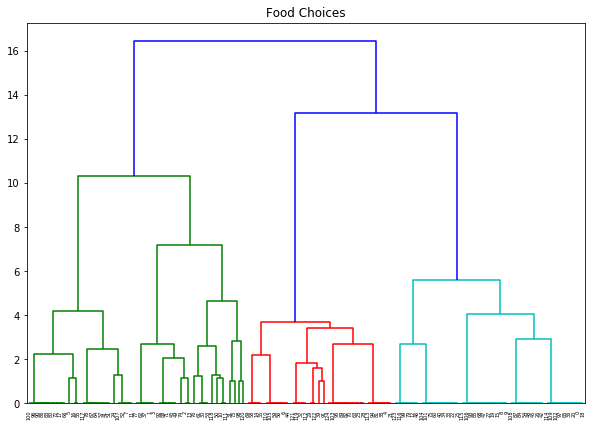

In [9]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
plt.title("Food Choices")
dend = sch.dendrogram(sch.linkage(food_df, method='ward'))

I used 'ward' as the method since it minimizes then variants of distances between the clusters.<br>
I try to set the threshold in such a way that it cuts the tallest vertical line. If I draw a horizontal line that passes through longest distance without a horizontal line, I get 4 clusters.<br>
Therefore, k = 4


##  <a id="head4"></a><font color='purple'>4. Step-by-step K-means 

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

<b> Data </b>

In [12]:
food_df

array([[5., 2., 1.],
       [2., 4., 1.],
       [2., 3., 2.],
       [2., 4., 1.],
       [4., 4., 1.],
       [1., 2., 1.],
       [4., 4., 2.],
       [3., 2., 1.],
       [5., 1., 1.],
       [5., 1., 1.],
       [2., 3., 3.],
       [3., 2., 1.],
       [3., 1., 1.],
       [2., 3., 2.],
       [4., 3., 2.],
       [5., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [5., 2., 1.],
       [5., 1., 1.],
       [5., 2., 1.],
       [4., 4., 1.],
       [4., 1., 1.],
       [4., 3., 1.],
       [3., 3., 1.],
       [4., 1., 1.],
       [4., 2., 1.],
       [5., 1., 1.],
       [4., 3., 1.],
       [5., 3., 1.],
       [2., 4., 3.],
       [4., 2., 4.],
       [5., 4., 1.],
       [4., 1., 1.],
       [4., 1., 1.],
       [4., 3., 2.],
       [5., 2., 1.],
       [2., 4., 1.],
       [4., 4., 1.],
       [5., 4., 2.],
       [4., 1., 1.],
       [2., 2., 1.],
       [4., 2., 1.],
       [2., 3., 1.],
       [4., 4., 2.],
       [4., 2., 1.],
       [3., 1., 1.],
       [5., 1

I chose three columns from the dataset

In [13]:
food_df = pd.DataFrame(food_df)
food_df.columns = ["exercise", "fruit_day", "nutritional_check"]
food_df.head(10)

   exercise  fruit_day  nutritional_check
0       5.0        2.0                1.0
1       2.0        4.0                1.0
2       2.0        3.0                2.0
3       2.0        4.0                1.0
4       4.0        4.0                1.0
5       1.0        2.0                1.0
6       4.0        4.0                2.0
7       3.0        2.0                1.0
8       5.0        1.0                1.0
9       5.0        1.0                1.0

According to the k I determined in the previous section, I randomly picked 4 points from data and call them as centroids. 


In [14]:
import random
import math
from math import sqrt

In [15]:

def calRandomCentroids(k, food_df):
    centroids = []
    for i in range(k):
        rand = random.randint(0,len(food_df)-1)
        randVal = tuple(food_df.loc[rand].values)
        while randVal in centroids:
            rand = random.randint(0,len(food_df)-1)
            randVal = tuple(food_df.loc[rand].values)
        else:
            centroids.append(randVal)
    return centroids

 I calculateed the distance between each data point and the randomly picked centroid.

Then, I assigned the data point to the cluster centroid whose distance is minimum among all the centroids.

In [16]:

def calDist(a,b):
    return math.sqrt(sum((np.array(a)-np.array(b))**2))

def makeClusters(k, food_df, centroids):
    clusters = {}
    for tup in centroids:
        clusters[tup] = []
    for i in range(len(food_df)):
        pointDists = {}
        for tup in centroids:
            dist = calDist(tuple(food_df.loc[i].values),tup)
            pointDists[dist] = tup
        ncp = pointDists.get(min(pointDists)) 
        clusters[ncp].append(i) #or i
    return clusters  

Next, I recalculated the new centroids using the formula.

In [17]:

def calNewCentroids(clusters):
    newcentroids = []
    for k in clusters:
        sumc = 0
        for l in range(len(clusters[k])):
            sumc += food_df.loc[clusters[k][l]]
        cent = sumc/len(clusters[k])
        newcentroids.append(tuple(cent))
    return newcentroids

In [18]:


def checkConvergence(k,oldcentroids,newcentroids):
    result = []
    for i in range(k):
        rs = calDist(oldcentroids[i],newcentroids[i])
        result.append(rs)
    #print("convergence result is {}".format(result))
    count = 0
    for i in range(len(result)):
        if result[i] <= 0.0001:
            count = count+1
    return True if count == len(result) else False 

 I am considering k=4 and calling the function kmeans()

In [19]:
    

def kmeans(k, food_df):
    
    centroids = calRandomCentroids(k, food_df)
    #print("random centroids are {}".format(centroids))
    oldcentroids = centroids
    
    clusters = makeClusters(k, food_df, oldcentroids)
    #print("first iter clusters are {}".format(clusters))   
    
    newcentroids = calNewCentroids(clusters)
    #print("new centroids are {}".format(newcentroids))
    
    res = checkConvergence(k,oldcentroids,newcentroids)
    #print(res)
    
    while res == False:
        oldcentroids = newcentroids
        clusters = makeClusters(k, food_df, oldcentroids)
        #print("further iter clusters are {}".format(clusters))   
        newcentroids = calNewCentroids(clusters)
        res = checkConvergence(k,oldcentroids,newcentroids)
        #print(res)
    else:
        print("Final clusterings are {}".format(clusters)) 
    

kmeans(4, food_df)   

Final clusterings are {(4.222222222222222, 3.5, 1.5555555555555556): [4, 6, 14, 21, 23, 28, 29, 31, 32, 35, 38, 39, 44, 56, 58, 59, 63, 69, 70, 81, 82, 89, 91, 94, 95, 98, 103, 105, 110, 112, 113, 119, 120, 121, 122, 124], (2.0454545454545454, 3.3636363636363638, 1.8181818181818181): [1, 2, 3, 10, 13, 24, 30, 37, 43, 49, 50, 53, 61, 62, 71, 74, 76, 77, 88, 92, 111, 118], (2.2413793103448274, 1.4137931034482758, 1.0): [5, 7, 11, 12, 16, 17, 41, 46, 51, 52, 55, 57, 64, 66, 67, 72, 78, 79, 80, 83, 86, 90, 96, 99, 100, 107, 116, 117, 123], (4.526315789473684, 1.4736842105263157, 1.0526315789473684): [0, 8, 9, 15, 18, 19, 20, 22, 25, 26, 27, 33, 34, 36, 40, 42, 45, 47, 48, 54, 60, 65, 68, 73, 75, 84, 85, 87, 93, 97, 101, 102, 104, 106, 108, 109, 114, 115]}


The kmeans() function accepts a dataframe and k as parameters, and returns the clusters created.
According to the Final clusterings output, the output shows that there are four clusters. It shows the centroid of each cluster and the rows number(student) that fall into each cluster.

##  <a id="head5"></a><font color='purple'>5. sklearn.cluster 

Creating the base k-means model using KMeans() Function

In [20]:
from sklearn.cluster import KMeans
#Initializing K-means with 4 clusters
k_means = KMeans(n_clusters = 4)
#Fitting the model on the data
k_means.fit(food_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
k_means.labels_

array([2, 3, 3, 3, 0, 1, 0, 1, 2, 2, 3, 1, 1, 3, 0, 2, 1, 1, 2, 2, 2, 0,
       2, 0, 3, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 0, 2, 3, 0, 0, 2, 1, 2, 3,
       0, 2, 1, 2, 2, 3, 3, 1, 1, 3, 2, 1, 0, 1, 0, 0, 2, 3, 3, 0, 1, 2,
       1, 1, 2, 0, 0, 3, 1, 0, 3, 2, 3, 3, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       0, 3, 0, 0, 2, 2, 1, 1, 3, 0, 0, 0, 0, 1, 0], dtype=int32)

In [22]:
print(k_means.cluster_centers_)

[[4.21621622 3.45945946 1.59459459]
 [2.24137931 1.4137931  1.        ]
 [4.54054054 1.45945946 1.        ]
 [2.04545455 3.36363636 1.81818182]]


In [23]:
food2 = food_df
food2.head(10)

   exercise  fruit_day  nutritional_check
0       5.0        2.0                1.0
1       2.0        4.0                1.0
2       2.0        3.0                2.0
3       2.0        4.0                1.0
4       4.0        4.0                1.0
5       1.0        2.0                1.0
6       4.0        4.0                2.0
7       3.0        2.0                1.0
8       5.0        1.0                1.0
9       5.0        1.0                1.0

Adding cluster column to the data frame to show which cluster(1-4) each student falls into.

In [24]:
food2['cluster'] = k_means.labels_ + 1
food2.head(10)

   exercise  fruit_day  nutritional_check  cluster
0       5.0        2.0                1.0        3
1       2.0        4.0                1.0        4
2       2.0        3.0                2.0        4
3       2.0        4.0                1.0        4
4       4.0        4.0                1.0        1
5       1.0        2.0                1.0        2
6       4.0        4.0                2.0        1
7       3.0        2.0                1.0        2
8       5.0        1.0                1.0        3
9       5.0        1.0                1.0        3

Showing how many total rows(students) fall into each cluster.

In [25]:
food2[food2.cluster == 1].shape

(37, 4)

There are 22 students in cluster 1.

In [26]:
food2[food2.cluster == 2].shape

(29, 4)

There are 37 students in cluster 2.

In [27]:
food2[food2.cluster == 3].shape

(37, 4)

There are 37 students in cluster 3.

In [28]:
food2[food2.cluster == 4].shape

(22, 4)

There are 29 students in cluster 4.

##  <a id="head6"></a><font color='purple'>6. Prediction

I created a coupon function that accepts 3 parameters, which represent the characteristics of the student, and will print coupons according to the cluster the student belongs to.

In [30]:

def coupon(p1,p2,p3):
    coupon = np.array(['coupon1','coupon2','coupon3','coupon4'])
    data_class = k_means.predict(np.array([exercise, fruit, nutritional_check]).reshape(1, -1))[0]  
    print('Student will receive', coupon[data_class])

for i in range(10):
    print(i+1)
    exercise = int(input('How often do you exercise in a regular week?(1-5): '))
    fruit = int(input('How likely to eat fruit in a regular day?(1-5): '))
    nutritional_check = int(input('How often do you check nutritional values?(1-5): '))
    coupon(exercise, fruit, nutritional_check)

1
How often do you exercise in a regular week?(1-5): 5
How likely to eat fruit in a regular day?(1-5): 2
How often do you check nutritional values?(1-5): 1
Student will receive coupon3
2
How often do you exercise in a regular week?(1-5): 2
How likely to eat fruit in a regular day?(1-5): 4
How often do you check nutritional values?(1-5): 1
Student will receive coupon4
3
How often do you exercise in a regular week?(1-5): 5
How likely to eat fruit in a regular day?(1-5): 1
How often do you check nutritional values?(1-5): 1
Student will receive coupon3
4
How often do you exercise in a regular week?(1-5): 1
How likely to eat fruit in a regular day?(1-5): 2
How often do you check nutritional values?(1-5): 1
Student will receive coupon2
5
How often do you exercise in a regular week?(1-5): 4
How likely to eat fruit in a regular day?(1-5): 1
How often do you check nutritional values?(1-5): 4
Student will receive coupon3
6
How often do you exercise in a regular week?(1-5): 1
How likely to eat fr

Due to the different student's preference in food, each student receive different coupon according to cluster that they are in.

##  <a id="head7"></a><font color='purple'>7. 2D prediction mesh

In [31]:
value = food.iloc[:, lambda food: [23, 31]].values

In [32]:
value_df = pd.DataFrame(value)
value_df.columns = ["exercise", "fruit_day"]
value_df.head(5)

   exercise  fruit_day
0       5.0        2.0
1       2.0        4.0
2       2.0        3.0
3       2.0        4.0
4       4.0        4.0

In [33]:
#Initializing K-means with 2 clusters
model = KMeans(n_clusters = 4)
#Fitting the model on the data
model.fit(value_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
model.labels_

array([0, 1, 1, 1, 3, 2, 3, 2, 0, 0, 1, 2, 2, 1, 3, 0, 2, 2, 0, 0, 0, 3,
       0, 3, 1, 0, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3, 0, 1, 3, 3, 0, 2, 0, 1,
       3, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 3, 2, 3, 3, 0, 1, 1, 3, 2, 0,
       2, 2, 0, 3, 3, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 3, 3, 2, 0, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 3, 3, 2, 0, 3, 2, 2, 0, 0, 3, 0, 3, 0, 2, 0, 0,
       3, 1, 3, 3, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3], dtype=int32)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


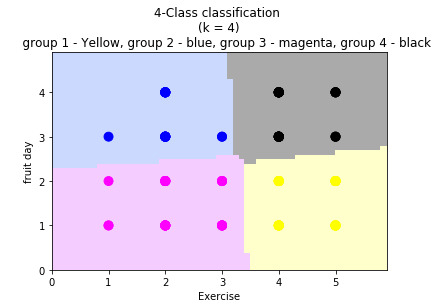

In [35]:
def plotMesh():
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'blue','magenta','black'])

    x_min, x_max = value_df.exercise.min() - 1, value_df.exercise.max() + 1
    y_min, y_max = value_df.fruit_day.min() - 1, value_df.fruit_day.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    # Plot also the training points
    plt.scatter(value_df.exercise, value_df.fruit_day, c = colormap[model.labels_], s = 80)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    group 1 - Yellow, group 2 - blue, group 3 - magenta, group 4 - black" % (4))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Exercise')
    ax.set_ylabel('fruit day')

    
plotMesh()

We can see the data points are in the form of four clusters. The data points in the top right (black group) belongs to the students who very likely eat fruit in a regular day and exercise very often. These are the students that are being healthy.

##  <a id="head8"></a><font color='purple'>8. Summary and Recommendation

My task is to create a recommendation engine for email coupon campaigns for a new all-you-can-eat buffet at the University of the Pacific. This engine will send targeted emails to students with coupons that are likely to encourage them to come. In order to create the engine to generate and email coupons based on food choices and preferences of college students, I have to put students into clusters. 

First, I cleaned the dataset by using the forward fill method to fill nan value. Second, I created a dendrogram and determined on the k number of clusters, which is k = 4. Then, I created function kmeans() to make clusters. This function will generate centroids and group students into the closest centroid. Moreover, I created coupon() function to predict which cluster the student belongs to and print coupons based on the characteristics of the student. Finally, I create a 2D prediction mesh to visualize students cluster based on their exercise and eating habit.

In conclusion, this coupon campaigns for a new all-you-can-eat buffet is an effective way to advertise this new buffet to students. This coupons will encourage more students to come to the new buffet because they will receive some offers about food that they are more likely to eat. This campaigns could help a new all-you-can eat buffet at the University of the Pacific improve its total sales and profit. 



